In [86]:
import os,glob
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
import os
import itertools
from typing import List, Tuple
import string
from os import walk
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,matthews_corrcoef,roc_curve, auc
import seaborn as sns
import csv


In [62]:
filenames = next(walk('/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis/gt/'), (None, None, []))[2]
filenames

['P15056.npy',
 'Q9H2G2.npy',
 'P43403.npy',
 'Q13546.npy',
 'P37023.npy',
 'P36897.npy',
 'Q96GD4.npy',
 'P29597.npy',
 'P43405.npy',
 'O00506.npy',
 'Q07912.npy',
 'Q04771.npy',
 'Q14012.npy',
 'Q9UKE5.npy',
 'Q02763.npy',
 'P19784.npy',
 'P07949.npy',
 'P24941.npy',
 'Q8IU85.npy',
 'Q9NSY1.npy',
 'Q9UHD2.npy',
 'P50750.npy',
 'Q9Z1W9.npy',
 'Q16288.npy',
 'Q16539.npy',
 'Q8WU08.npy',
 'Q86UE8.npy',
 'P06493.npy',
 'Q9UM73.npy',
 'Q13882.npy',
 'Q2M2I8.npy',
 'Q8IYT8.npy',
 'O43318.npy',
 'P33981.npy',
 'P17612.npy',
 'P30291.npy',
 'Q86Y07.npy',
 'P68400.npy',
 'P55144.npy',
 'Q9H2K8.npy',
 'Q16620.npy',
 'Q59H18.npy',
 'P51813.npy',
 'O14965.npy',
 'Q6PHR2.npy',
 'P00519.npy',
 'P28482.npy',
 'O75385.npy',
 'Q00535.npy',
 'O43741.npy']

In [76]:
alpha_pdbs = glob.glob("/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis/alphafold2_struct/*.pdb")

In [88]:
import matplotlib.pyplot as plt

def get_confidences(pdb_files: list) -> list:
    """
    Read AlphaFold PDB file contents to find confidence info
    @param: pdbs glob list of AlphaFold PDB files
    @return: confidence_info list containing the dictionary of confidence info
    """
    counter = 1
    confidence_info = []
    for pdb_file in pdb_files:
        print(f"At {counter}/{len(pdb_files)}")
        file = open(pdb_file)
        lines = file.readlines()
        file.close()
        confidence_scores = []
        confidence_dict = {}
        for line in lines:
            if line.startswith("ATOM"):
                current_line = line.split()
                confidence_score = float(current_line[-2])
                confidence_scores.append(confidence_score)
        uniprot_id = pdb_file.split('/')[-1].split('.')[0]
        confidence_dict["UniProt_ID"] = uniprot_id
        confidence_dict["mean"] = np.mean(confidence_scores)
        confidence_dict["std"] = np.std(confidence_scores)
        confidence_dict["filename"] = pdb_file
        confidence_info.append(confidence_dict)
        counter += 1
    return confidence_info

def save_to_csv(confidence_info: list, filename: str = "confidence_data.csv"):
    """
    Save the confidence info to a csv file
    @param: confidence_info List containing dictionaries of confidence info
    @param: filename Name of the output csv file (default is "confidence_data.csv")
    """
    # specifying the fields for csv file
    fields = ['UniProt_ID', 'mean', 'std', 'filename']

    # writing to csv file
    with open(filename, 'w') as csvfile:
        # creating a csv dict writer object
        writer = csv.DictWriter(csvfile, fieldnames = fields)
        
        # writing headers (field names)
        writer.writeheader()
        
        # writing data rows
        writer.writerows(confidence_info)

    print(f"Data saved to {filename}")


def plot_confidence_distribution(pdb_files: list):
    """
    Plot the distribution of average confidence scores
    @param pdb_files: glob list of AlphaFold PDBs
    """
    confidence_list = get_confidences(pdb_files)
    confidence_dataframe = pd.DataFrame.from_dict(confidence_list)
    
    # Plot the distribution of average confidence scores
    plt.hist(confidence_dataframe['mean'], bins=20, alpha=0.5, color='#047F8F')
    plt.xlabel('Average Confidence Score')
    plt.ylabel('Number of Structures')
    plt.title('Distribution of Average Confidence Scores')
    plt.grid(True)
    plt.show()



In [89]:
confidences=get_confidences(alpha_pdbs)

At 1/50
At 2/50
At 3/50
At 4/50
At 5/50
At 6/50
At 7/50
At 8/50
At 9/50
At 10/50
At 11/50
At 12/50
At 13/50
At 14/50
At 15/50
At 16/50
At 17/50
At 18/50
At 19/50
At 20/50
At 21/50
At 22/50
At 23/50
At 24/50
At 25/50
At 26/50
At 27/50
At 28/50
At 29/50
At 30/50
At 31/50
At 32/50
At 33/50
At 34/50
At 35/50
At 36/50
At 37/50
At 38/50
At 39/50
At 40/50
At 41/50
At 42/50
At 43/50
At 44/50
At 45/50
At 46/50
At 47/50
At 48/50
At 49/50
At 50/50


In [90]:
confidences

[{'UniProt_ID': 'P36897',
  'mean': 85.12333163135051,
  'std': 18.705966535414625,
  'filename': '/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis/alphafold2_struct/P36897.pdb'},
 {'UniProt_ID': 'Q96GD4',
  'mean': 79.85403540462428,
  'std': 25.66617046556115,
  'filename': '/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis/alphafold2_struct/Q96GD4.pdb'},
 {'UniProt_ID': 'Q13546',
  'mean': 69.91086679174485,
  'std': 26.14175282904249,
  'filename': '/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis/alphafold2_struct/Q13546.pdb'},
 {'UniProt_ID': 'P43403',
  'mean': 85.74682161060142,
  'std': 19.01268132703556,
  'filename': '/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis/alphafold2_struct/P43403.pdb'},
 {'UniProt_ID': 'P37023',
  'mean': 82.83821482986288,
  'std': 20.762852862795516,
  'filename': '/Users/rohan/Protein_ContactMaps

In [91]:
save_to_csv(confidences, "af2_confidence_data.csv")

Data saved to af2_confidence_data.csv


In [93]:
import pandas as pd

def get_high_confidence_files(csv_file: str, threshold: float = 70.0):
    """
    Filter the confidence information based on a given threshold
    @param csv_file: str, path to the csv file that contains the confidence information
    @param threshold: float, confidence threshold
    @return: list of filenames that have a mean confidence above the threshold
    """
    # Load the confidence data
    confidence_df = pd.read_csv(csv_file)
    
    # Filter to only include rows with a mean confidence above the threshold
    high_confidence_df = confidence_df[confidence_df['mean'] > threshold]
    
    # Extract the filenames and convert to a list
    high_confidence_files = high_confidence_df['UniProt_ID'].tolist()
    
    return high_confidence_files

# Use the function
high_confidence_files = get_high_confidence_files('af2_confidence_data.csv')
print(high_confidence_files)


['P36897', 'Q96GD4', 'P43403', 'P37023', 'Q04771', 'Q14012', 'O00506', 'P43405', 'P29597', 'Q8IU85', 'P07949', 'P24941', 'Q02763', 'P19784', 'Q86UE8', 'Q16288', 'Q16539', 'Q8WU08', 'P50750', 'Q9Z1W9', 'Q9UHD2', 'Q13882', 'P06493', 'Q86Y07', 'P68400', 'P55144', 'P17612', 'O14965', 'Q6PHR2', 'Q59H18', 'P51813', 'Q9H2K8', 'Q16620', 'O43741', 'Q00535', 'P28482']


In [95]:
high_confidence_files = [f + '.npy' for f in high_confidence_files]
print(high_confidence_files)

['P36897.npy', 'Q96GD4.npy', 'P43403.npy', 'P37023.npy', 'Q04771.npy', 'Q14012.npy', 'O00506.npy', 'P43405.npy', 'P29597.npy', 'Q8IU85.npy', 'P07949.npy', 'P24941.npy', 'Q02763.npy', 'P19784.npy', 'Q86UE8.npy', 'Q16288.npy', 'Q16539.npy', 'Q8WU08.npy', 'P50750.npy', 'Q9Z1W9.npy', 'Q9UHD2.npy', 'Q13882.npy', 'P06493.npy', 'Q86Y07.npy', 'P68400.npy', 'P55144.npy', 'P17612.npy', 'O14965.npy', 'Q6PHR2.npy', 'Q59H18.npy', 'P51813.npy', 'Q9H2K8.npy', 'Q16620.npy', 'O43741.npy', 'Q00535.npy', 'P28482.npy']


In [96]:
len(high_confidence_files)

36

At 1/50
At 2/50
At 3/50
At 4/50
At 5/50
At 6/50
At 7/50
At 8/50
At 9/50
At 10/50
At 11/50
At 12/50
At 13/50
At 14/50
At 15/50
At 16/50
At 17/50
At 18/50
At 19/50
At 20/50
At 21/50
At 22/50
At 23/50
At 24/50
At 25/50
At 26/50
At 27/50
At 28/50
At 29/50
At 30/50
At 31/50
At 32/50
At 33/50
At 34/50
At 35/50
At 36/50
At 37/50
At 38/50
At 39/50
At 40/50
At 41/50
At 42/50
At 43/50
At 44/50
At 45/50
At 46/50
At 47/50
At 48/50
At 49/50
At 50/50


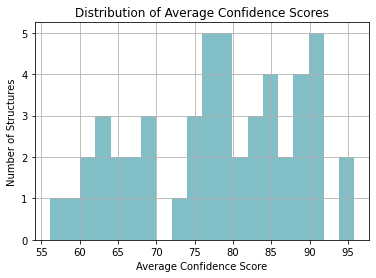

In [85]:
plot_confidence_distribution(alpha_pdbs)

In [5]:
def getCmaps(file,path):
    gt=np.load(path+'gt/'+file)
    esm=np.load(path+'esm_cmaps/'+file)
    alpha=np.load(path+'alpha_fold_cmaps/'+file)
    pcons=np.load(path+'pconsc4/'+file)
    pcons=pcons >= 0.5
    pcons=np.multiply(pcons,1)
    return gt,alpha,esm,pcons

In [6]:
from matplotlib.patches import PathPatch
import matplotlib.pyplot as plt
from matplotlib.gridspec import SubplotSpec

def create_subtitle(fig: plt.Figure, grid: SubplotSpec, title: str):
    "Sign sets of subplots with title"
    row = fig.add_subplot(grid)
    # the '\n' is important
    row.set_title(f'{title}\n', fontweight='bold',fontsize=35,ha='center',va='bottom')
    # hide subplot
    row.set_frame_on(False)
    row.axis('off')
    
def adjust_box_widths(g, fac):
    """
    Adjust the withs of a seaborn-generated boxplot.
    """

    # iterating through Axes instances
    for ax in g.axes:

        # iterating through axes artists:
        for c in ax.get_children():

            # searching for PathPatches
            if isinstance(c, PathPatch):
                # getting current width of box:
                p = c.get_path()
                verts = p.vertices
                verts_sub = verts[:-1]
                xmin = np.min(verts_sub[:, 0])
                xmax = np.max(verts_sub[:, 0])
                xmid = 0.5*(xmin+xmax)
                xhalf = 0.5*(xmax - xmin)

                # setting new width of box
                xmin_new = xmid-fac*xhalf
                xmax_new = xmid+fac*xhalf
                verts_sub[verts_sub[:, 0] == xmin, 0] = xmin_new
                verts_sub[verts_sub[:, 0] == xmax, 0] = xmax_new

                # setting new width of median line
                for l in ax.lines:
                    if np.all(l.get_xdata() == [xmin, xmax]):
                        l.set_xdata([xmin_new, xmax_new])

In [7]:
results_path = "/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/kinases_cmap_analysis/results/"

In [97]:
filenames=high_confidence_files

In [ ]:
### Computing metrics data 

In [98]:
import pandas as pd
import numpy as np
from sklearn.metrics import matthews_corrcoef, f1_score, precision_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define paths and files
results_path = "/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis/"


# Define a function to calculate metrics
def calculate_metrics(gt, contact_map):
    L = gt.shape[0]
    gt = gt.flatten()
    contact_map = contact_map.flatten()
    mcc = matthews_corrcoef(gt, contact_map)
    f1 = f1_score(gt, contact_map)
    precision = precision_score(gt, contact_map, zero_division=0)
    return mcc, f1, precision

# Define lists to store the results for each method
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4"]
all_results = []

# Iterate over each method
for method in methods:
    method_f1 = []
    method_mcc = []
    method_precision = []
    for file in filenames:
        # Load the contact maps
        gt = np.load(results_path + "/gt/" + file)
        contact_map = np.load(results_path + "/" + method + "/" + file)
        if method=="pconsc4":
            contact_map =contact_map  >= 0.5
            contact_map =np.multiply(contact_map,1)
        
        # Crop the contact map to match the size of the ground truth
        min_shape = min(gt.shape, contact_map.shape)
        gt = gt[:min_shape[0], :min_shape[1]]
        contact_map = contact_map[:min_shape[0], :min_shape[1]]

        # Compare the contact maps
        mcc, f1, precision = calculate_metrics(gt, contact_map)
        method_f1.append(f1)
        method_mcc.append(mcc)
        method_precision.append(precision)

    # Calculate the average metrics for the method
    avg_f1 = np.mean(method_f1)
    avg_mcc = np.mean(method_mcc)
    avg_precision = np.mean(method_precision)

    # Save the results in a dataframe
    df = pd.DataFrame({
        "Method": [method]*len(filenames),
        "File": filenames,
        "Precision": method_precision,
        "MCC": method_mcc,
        "F1": method_f1
    })

    # Append the dataframe to the list of all results
    all_results.append(df)

# Concatenate all dataframes into a single dataframe
df_all_results = pd.concat(all_results)




In [99]:
df_all_results

,Method,File,Precision,MCC,F1
0,alpha_fold_cmaps,P36897.npy,0.687599,0.674522,0.686083
1,alpha_fold_cmaps,Q96GD4.npy,0.675066,0.674886,0.688003
2,alpha_fold_cmaps,P43403.npy,0.651099,0.636185,0.649538
3,alpha_fold_cmaps,P37023.npy,0.625446,0.616094,0.629944
4,alpha_fold_cmaps,Q04771.npy,0.718447,0.708888,0.719145
...,...,...,...,...,...
31,pconsc4,Q9H2K8.npy,0.680431,0.548049,0.550372
32,pconsc4,Q16620.npy,0.779565,0.647295,0.648181
33,pconsc4,O43741.npy,0.109877,0.179553,0.164510
34,pconsc4,Q00535.npy,0.144545,0.271704,0.228448


In [100]:
df_all_results['Method'].replace({"alpha_fold_cmaps": "Alphafold2", "esm_cmaps": "ESM", "pconsc4": "Pconsc4"}, inplace=True)


In [101]:
import numpy as np

methods=['Pconsc4','ESM','Alphafold2']
# Group the results by method
grouped_results = df_all_results.groupby("Method")

# Calculate the mean and standard deviation of each metric for each method
mean_precision = grouped_results["Precision"].mean()
mean_mcc = grouped_results["MCC"].mean()
mean_f1 = grouped_results["F1"].mean()
std_precision = grouped_results["Precision"].std()
std_mcc = grouped_results["MCC"].std()
std_f1 = grouped_results["F1"].std()

# Print the mean and standard deviation of each metric for each method
for method in methods:
    print(f"Method: {method}")
    print(f"Mean Precision: {mean_precision[method]:.2f} ± {std_precision[method]:.2f}")
    print(f"Mean MCC: {mean_mcc[method]:.2f} ± {std_mcc[method]:.2f}")
    print(f"Mean F1: {mean_f1[method]:.2f} ± {std_f1[method]:.2f}")
    print()


Method: Pconsc4
Mean Precision: 0.55 ± 0.28
Mean MCC: 0.49 ± 0.18
Mean F1: 0.48 ± 0.20

Method: ESM
Mean Precision: 0.13 ± 0.07
Mean MCC: 0.07 ± 0.04
Mean F1: 0.08 ± 0.04

Method: Alphafold2
Mean Precision: 0.52 ± 0.25
Mean MCC: 0.51 ± 0.24
Mean F1: 0.52 ± 0.25



In [105]:
import numpy as np

methods=['Pconsc4','ESM','Alphafold2']
# Group the results by method
grouped_results = df_all_results.groupby("Method")

# Calculate the mean and standard deviation of each metric for each method
mean_precision = grouped_results["Precision"].mean()
mean_mcc = grouped_results["MCC"].mean()
mean_f1 = grouped_results["F1"].mean()
std_precision = grouped_results["Precision"].std()
std_mcc = grouped_results["MCC"].std()
std_f1 = grouped_results["F1"].std()

# Print the mean and standard deviation of each metric for each method
for method in methods:
    print(f"Method: {method}")
    print(f"Mean Precision: {mean_precision[method]:.2f} ± {std_precision[method]:.2f}")
    print(f"Mean MCC: {mean_mcc[method]:.2f} ± {std_mcc[method]:.2f}")
    print(f"Mean F1: {mean_f1[method]:.2f} ± {std_f1[method]:.2f}")
    print()


Method: Pconsc4
Mean Precision: 0.59 ± 0.25
Mean MCC: 0.51 ± 0.16
Mean F1: 0.51 ± 0.17

Method: ESM
Mean Precision: 0.13 ± 0.08
Mean MCC: 0.07 ± 0.04
Mean F1: 0.09 ± 0.04

Method: Alphafold2
Mean Precision: 0.55 ± 0.22
Mean MCC: 0.54 ± 0.21
Mean F1: 0.55 ± 0.22



In [47]:
from scipy.stats import ttest_ind, ks_2samp, wilcoxon

# Perform statistical tests on each pair of methods
for metric in ["Precision", "MCC", "F1"]:
    print(f"\nStatistical comparison for {metric}:")
    for i in range(len(methods)):
        for j in range(i+1, len(methods)):
            method1 = methods[i]
            method2 = methods[j]
            
            print(f"\nComparing {method1} and {method2}:")

            method1_metrics = grouped_results.get_group(method1)[metric]
            method2_metrics = grouped_results.get_group(method2)[metric]

            # Welch's t-test
            t_stat, p_value_t = ttest_ind(method1_metrics, method2_metrics, equal_var=False)
            print(f"P-value from Welch's t-test: {p_value_t:.20f}")

            # Kolmogorov-Smirnov test
            ks_stat, p_value_ks = ks_2samp(method1_metrics, method2_metrics)a
            print(f"P-value from Kolmogorov-Smirnov test: {p_value_ks:.20f}")

            # Wilcoxon signed-rank test
            # Note: Wilcoxon test requires paired data of the same length
            if len(method1_metrics) == len(method2_metrics):
                w_stat, p_value_w = wilcoxon(method1_metrics, method2_metrics)
                print(f"P-value from Wilcoxon signed-rank test: {p_value_w:.20f}")
            else:
                print("Cannot perform Wilcoxon signed-rank test as the lengths of the data are unequal.")



Statistical comparison for Precision:

Comparing Pconsc4 and ESM:
P-value from Welch's t-test: 0.00000000000000000785
P-value from Kolmogorov-Smirnov test: 0.00000000000000034315
P-value from Wilcoxon signed-rank test: 0.00000000075569294559

Comparing Pconsc4 and Alphafold2:
P-value from Welch's t-test: 0.38155006508010613775
P-value from Kolmogorov-Smirnov test: 0.00584177814269473076
P-value from Wilcoxon signed-rank test: 0.00051977344440312092

Comparing ESM and Alphafold2:
P-value from Welch's t-test: 0.00000000000000000045
P-value from Kolmogorov-Smirnov test: 0.00000000000000034315
P-value from Wilcoxon signed-rank test: 0.00000000075569294559

Statistical comparison for MCC:

Comparing Pconsc4 and ESM:
P-value from Welch's t-test: 0.00000000000000000000
P-value from Kolmogorov-Smirnov test: 0.00000000000000000000
P-value from Wilcoxon signed-rank test: 0.00000000075569294559

Comparing Pconsc4 and Alphafold2:
P-value from Welch's t-test: 0.42362430777880732968
P-value from Ko

In [48]:
from scipy.stats import ttest_ind, ks_2samp, wilcoxon

# Perform statistical tests on each pair of methods
for metric in ["Precision", "MCC", "F1"]:
    print(f"\nStatistical comparison for {metric}:")
    for i in range(len(methods)):
        for j in range(i+1, len(methods)):
            method1 = methods[i]
            method2 = methods[j]
            
            print(f"\nComparing {method1} and {method2}:")

            method1_metrics = grouped_results.get_group(method1)[metric]
            method2_metrics = grouped_results.get_group(method2)[metric]

            # Welch's t-test
            t_stat, p_value_t = ttest_ind(method1_metrics, method2_metrics, equal_var=False)
            print(f"P-value from Welch's t-test: {p_value_t:.2e}")

            # Kolmogorov-Smirnov test
            ks_stat, p_value_ks = ks_2samp(method1_metrics, method2_metrics)
            print(f"P-value from Kolmogorov-Smirnov test: {p_value_ks:.2e}")

            # Wilcoxon signed-rank test
            # Note: Wilcoxon test requires paired data of the same length
            if len(method1_metrics) == len(method2_metrics):
                w_stat, p_value_w = wilcoxon(method1_metrics, method2_metrics)
                print(f"P-value from Wilcoxon signed-rank test: {p_value_w:.2e}")
            else:
                print("Cannot perform Wilcoxon signed-rank test as the lengths of the data are unequal.")



Statistical comparison for Precision:

Comparing Pconsc4 and ESM:
P-value from Welch's t-test: 7.85e-18
P-value from Kolmogorov-Smirnov test: 3.43e-16
P-value from Wilcoxon signed-rank test: 7.56e-10

Comparing Pconsc4 and Alphafold2:
P-value from Welch's t-test: 3.82e-01
P-value from Kolmogorov-Smirnov test: 5.84e-03
P-value from Wilcoxon signed-rank test: 5.20e-04

Comparing ESM and Alphafold2:
P-value from Welch's t-test: 4.54e-19
P-value from Kolmogorov-Smirnov test: 3.43e-16
P-value from Wilcoxon signed-rank test: 7.56e-10

Statistical comparison for MCC:

Comparing Pconsc4 and ESM:
P-value from Welch's t-test: 1.91e-25
P-value from Kolmogorov-Smirnov test: 9.81e-26
P-value from Wilcoxon signed-rank test: 7.56e-10

Comparing Pconsc4 and Alphafold2:
P-value from Welch's t-test: 4.24e-01
P-value from Kolmogorov-Smirnov test: 2.83e-03
P-value from Wilcoxon signed-rank test: 4.89e-03

Comparing ESM and Alphafold2:
P-value from Welch's t-test: 6.42e-21
P-value from Kolmogorov-Smirnov 

In [10]:
from scipy.stats import chi2_contingency

def get_cmaps(file, path):
    gt = np.load(path + 'gt/' + file)
    esm = np.load(path + 'esm_cmaps/' + file)
    alpha = np.load(path + 'alpha_fold_cmaps/' + file)
    pcons = np.load(path + 'pconsc4/' + file)
    pcons = pcons >= 0.5
    pcons = np.multiply(pcons, 1)
    min_shape = min(gt.shape,esm.shape,alpha.shape,pcons.shape)
    gt = gt[:min_shape[0], :min_shape[1]]
    esm = esm[:min_shape[0], :min_shape[1]]
    alpha = alpha[:min_shape[0], :min_shape[1]]
    pcons = pcons[:min_shape[0], :min_shape[1]]
    return gt, alpha,esm,pcons

path = "/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis/"

cmaps = []
for file in filenames:
    cmaps.append(get_cmaps(file, path))

# Define the methods for comparison
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4"]
# Create an empty 2D array to store the p-values
p_values = np.zeros((len(methods), len(methods)))
# Perform McNemar test for alpha_fold_cmaps and pconsc4
method1 = "alpha_fold_cmaps"
method2 = "pconsc4"
contingency_table = np.zeros((2, 2))
for cmap in cmaps:
    
    gt = cmap[0]
    cmap1 = cmap[methods.index(method1) + 1]
    cmap2 = cmap[methods.index(method2) + 1]
    print(cmap1.shape, cmap2.shape, gt.shape)
    cmap1_true = np.logical_and(cmap1 == 1, gt == 1)
    cmap1_false = np.logical_and(cmap1 == 1, gt == 0)
    cmap2_true = np.logical_and(cmap2 == 1, gt == 1)
    cmap2_false = np.logical_and(cmap2 == 1, gt == 0)
    contingency_table[0, 0] += np.sum(np.logical_and(cmap1_true, cmap2_true))
    contingency_table[0, 1] += np.sum(np.logical_and(cmap1_true, cmap2_false))
    contingency_table[1, 0] += np.sum(np.logical_and(cmap1b_false, cmap2_true))
    contingency_table[1, 1] += np.sum(np.logical_and(cmap1_false, cmap2_false))
    try:
        chi2, p_value, df, expected = chi2_contingency(contingency_table)
        p_values[i, j] = p_value
    except ValueError:
            # Set p-value to if the contingency table has a zero element
        p_values[i, j] = 1
        continue

print(f"The p-value for {method1} and {method2} is {p_value:.50f}.")
print(f"The chi2-value for {method1} and {method2} is {chi2:.50f}.")

NameError: name 'p_value' is not defined

In [14]:

methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4"]
# Create an empty 2D array to store the p-values
p_values = np.zeros((len(methods), len(methods)))
# Perform McNemar test for alpha_fold_cmaps and pconsc4
method1 = "alpha_fold_cmaps"
method2 = "pconsc4"
contingency_table = np.zeros((2, 2))
for cmap in cmaps:
    
    gt = cmap[0]
    cmap1 = cmap[methods.index(method1) + 1]
    cmap2 = cmap[methods.index(method2) + 1]
    print(cmap1.shape, cmap2.shape, gt.shape)
    cmap1_true = np.logical_and(cmap1 == 1, gt == 1)
    cmap1_false = np.logical_and(cmap1 == 1, gt == 0)
    cmap2_true = np.logical_and(cmap2 == 1, gt == 1)
    cmap2_false = np.logical_and(cmap2 == 1, gt == 0)
    contingency_table[0, 0] += np.sum(np.logical_and(cmap1_true, cmap2_true))
    contingency_table[0, 1] += np.sum(np.logical_and(cmap1_true, cmap2_false))
    contingency_table[1, 0] += np.sum(np.logical_and(cmap1_false, cmap2_true))
    contingency_table[1, 1] += np.sum(np.logical_and(cmap1_false, cmap2_false))
    try:
        chi2, p_value, df, expected = chi2_contingency(contingency_table)
        p_values[i, j] = p_value
    except ValueError:
            # Set p-value to 1 if the contingency table has a zero element
        p_values[i, j] = 1
        continue
# Perform McNemar test
#chi2, p_value, df, expected = chi2_contingency(contingency_table)
# try:
#     chi2, p_value, df, expected = chi2_contingency(contingency_table)
# except ValueError as e:
#     if str(e).startswith("The internally computed table of expected frequencies has a zero element"):
#         continue
#     else:
#         raise
print(f"The p-value for {method1} and {method2} is {np.mean(p_values):.50f}.")
print(f"The chi2-value for {method1} and {method2} is {chi2:.50f}.")

The p-value for alpha_fold_cmaps and pconsc4 is 0.00000000000000000000000000000000000000000000000000.


NameError: name 'chi2' is not defined

In [31]:
def get_cmaps(file, path):
    gt = np.load(path + 'gt/' + file)
    esm = np.load(path + 'esm_cmaps/' + file)
    alpha = np.load(path + 'alpha_fold_cmaps/' + file)
    pcons = np.load(path + 'pconsc4/' + file)
    pcons = pcons >= 0.5
    pcons = np.multiply(pcons, 1)
    min_shape = min(gt.shape,esm.shape,alpha.shape,pcons.shape)
    gt = gt[:min_shape[0], :min_shape[1]]
    esm = esm[:min_shape[0], :min_shape[1]]
    alpha = alpha[:min_shape[0], :min_shape[1]]
    pcons = pcons[:min_shape[0], :min_shape[1]]
    return gt, alpha,esm,pcons

In [32]:
!pwd

/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis


In [37]:
from scipy.stats import ttest_ind, ks_2samp, wilcoxon

path = "/Users/rohan/Protein_ContactMaps_DL_BindingAffinity/Figures/Fig3_kinases_cmap_analysis/"

cmaps = []
for file in filenames:
    cmaps.append(get_cmaps(file, path))

# Define the methods for comparison
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4"]
# Create lists to store the p-values for each test
p_values_t = []
p_values_ks = []
p_values_w = []

method1 = "alpha_fold_cmaps"
method2 = "pconsc4"
for cmap in cmaps:
    gt = cmap[0]
    cmap1 = cmap[methods.index(method1) + 1]
    cmap2 = cmap[methods.index(method2) + 1]
    print(cmap1.shape, cmap2.shape, gt.shape)
    
    cmap1_true = np.logical_and(cmap1 == 1, gt == 1).flatten().astype(int)
    cmap2_true = np.logical_and(cmap2 == 1, gt == 1).flatten().astype(int)
    
    # Welch's t-test
    t_stat, p_value_t = ttest_ind(cmap1_true, cmap2_true, equal_var=False)
    p_values_t.append(p_value_t)

    # Kolmogorov-Smirnov test
    ks_stat, p_value_ks = ks_2samp(cmap1_true, cmap2_true)
    p_values_ks.append(p_value_ks)

    # Wilcoxon signed-rank test
    # Note: Wilcoxon test requires paired data of the same length
    if len(cmap1_true) == len(cmap2_true):
        w_stat, p_value_w = wilcoxon(cmap1_true, cmap2_true)
        p_values_w.append(p_value_w)
    else:
        print("Cannot perform Wilcoxon signed-rank test as the lengths of the data are unequal.")

# Print mean p-value across all cmaps
print(f"\nThe p-value for {method1} and {method2} using Welch's t-test across all cmaps is {np.mean(p_values_t):.50f}.")
print(f"The p-value for {method1} and {method2} using Kolmogorov-Smirnov test across all cmaps is {np.mean(p_values_ks):.50f}.")
if len(p_values_w) > 0:
    print(f"The p-value for {method1} and {method2} using Wilcoxon signed-rank test across all cmaps is {np.mean(p_values_w):.50f}.")
else:
    print("Could not perform Wilcoxon signed-rank test due to unequal data lengths.")


(258, 258) (258, 258) (258, 258)
(277, 277) (277, 277) (277, 277)
(282, 282) (282, 282) (282, 282)
(247, 247) (247, 247) (247, 247)
(291, 291) (291, 291) (291, 291)
(299, 299) (299, 299) (299, 299)
(253, 253) (253, 253) (253, 253)
(286, 286) (286, 286) (286, 286)
(268, 268) (268, 268) (268, 268)
(289, 289) (289, 289) (289, 289)
(255, 255) (255, 255) (255, 255)
(296, 296) (296, 296) (296, 296)
(263, 263) (263, 263) (263, 263)
(272, 272) (272, 272) (272, 272)
(299, 299) (299, 299) (299, 299)
(350, 350) (350, 350) (350, 350)
(284, 284) (284, 284) (284, 284)
(298, 298) (298, 298) (298, 298)
(266, 266) (266, 266) (266, 266)
(267, 267) (267, 267) (267, 267)
(308, 308) (308, 308) (308, 308)
(372, 372) (372, 372) (372, 372)
(287, 287) (287, 287) (287, 287)
(263, 263) (263, 263) (263, 263)
(360, 360) (360, 360) (360, 360)
(350, 350) (350, 350) (350, 350)
(288, 288) (288, 288) (288, 288)
(297, 297) (297, 297) (297, 297)
(286, 286) (286, 286) (286, 286)
(264, 264) (264, 264) (264, 264)
(314, 314)

In [28]:
p_values_t

[]

In [29]:
cmaps

[]

In [61]:
# Define the methods for comparison
methods = ["alpha_fold_cmaps", "esm_cmaps", "pconsc4"]
# Create an empty 2D array to store the p-valuesa
p_values = np.zeros((len(methods), len(methods)))
# Perform McNemar test for alpha_fold_cmaps and pconsc4
method1 = "alpha_fold_cmaps"
method2 = "pconsc4"
contingency_table = np.zeros((2, 2))
for cmap in cmaps:
    
    gt = cmap[0]
    cmap1 = cmap[methods.index(method1) + 1]
    cmap2 = cmap[methods.index(method2) + 1]
    print(cmap1.shape, cmap2.shape, gt.shape)
    cmap1_true = np.logical_and(cmap1 == 1, gt == 1)
    cmap1_false = np.logical_and(cmap1 == 1, gt == 0)
    cmap2_true = np.logical_and(cmap2 == 1, gt == 1)
    cmap2_false = np.logical_and(cmap2 == 1, gt == 0)
    from scipy.stats import ttest_ind, ks_2samp, wilcoxon

# Welch's t-test
t_stat, p_value_t = ttest_ind(cmap1_true, cmap2_true, equal_var=False)
print(f"The p-value for {method1} and {method2} using Welch's t-test is {p_value_t:.50f}.")
print(f"The t-statistic for {method1} and {method2} is {t_stat:.50f}.")  

# Kolmogorov-Smirnov test
ks_stat, p_value_ks = ks_2samp(cmap1_true, cmap2_true)
print(f"The p-value for {method1} and {method2} using Kolmogorov-Smirnov test is {p_value_ks:.50f}.")
print(f"The KS statistic for {method1} and {method2} is {ks_stat:.50f}.")  

# Wilcoxon signed-rank test
# Note: Wilcoxon test requires paired data of the same length
if len(cmap1_true) == len(cmap2_true):
    w_stat, p_value_w = wilcoxon(cmap1_true, cmap2_true)
    print(f"The p-value for {method1} and {method2} using Wilcoxon signed-rank test is {p_value_w:.50f}.")
    print(f"The W statistic for {method1} and {method2} is {w_stat:.50f}.")  
else:
    print("Cannot perform Wilcoxon signed-rank test as the lengths of the data are unequal.")

print(f"The p-value for {method1} and {method2} is {p_value:.50f}.")
print(f"The chi2-value for {method1} and {method2} is {chi2:.50f}.")

In [103]:
sns.set(font_scale = 2.5,style="white")

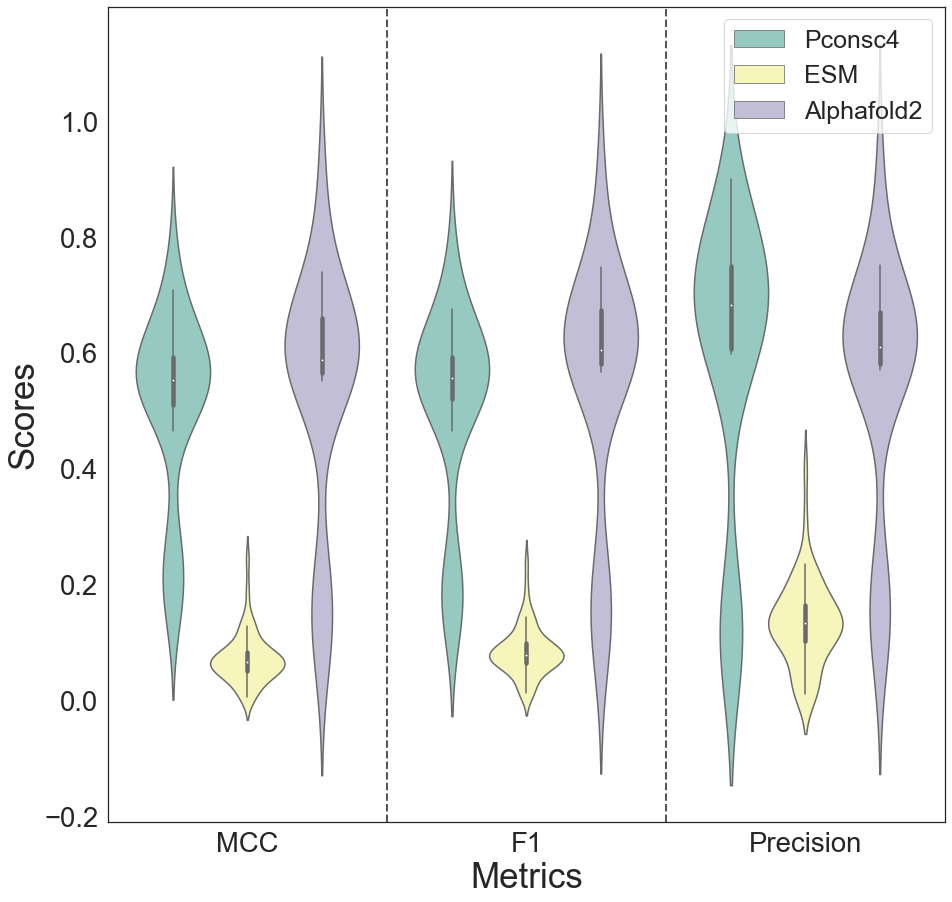

In [76]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("white")
fig = plt.figure(figsize=(15, 15))

#adjust_box_widths(fig, 1)
# Define order of x-axis variables
metric_order = [ 'MCC', 'F1','Precision']

# Define order of hue variable (methods)
#hue_order = df_all_results['Method'].unique()
hue_order=['Pconsc4','ESM','Alphafold2']
# Create figure


# Create boxplot using seaborn
ax=sns.violinplot(x='variable', y='value', hue='Method', data=pd.melt(df_all_results[['Method', 'Precision', 'MCC', 'F1']], id_vars=['Method']), order=metric_order, palette="Set3", hue_order=hue_order,scale='width')

# Add vertical lines separating x-axis variables
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)

# Set labels and legend
ax.set_xlabel('Metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
plt.legend(loc='upper right', fontsize=25)

# Show plot
plt.show()
fig.savefig(os.path.join('results',  'cmap_comparision' + '.png'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results',  'cmap_comparision' + '.pdf'), dpi=500, bbox_inches='tight')
fig.savefig(os.path.join('results',  'cmap_comparision' + '.svg'), dpi=500, bbox_inches='tight')



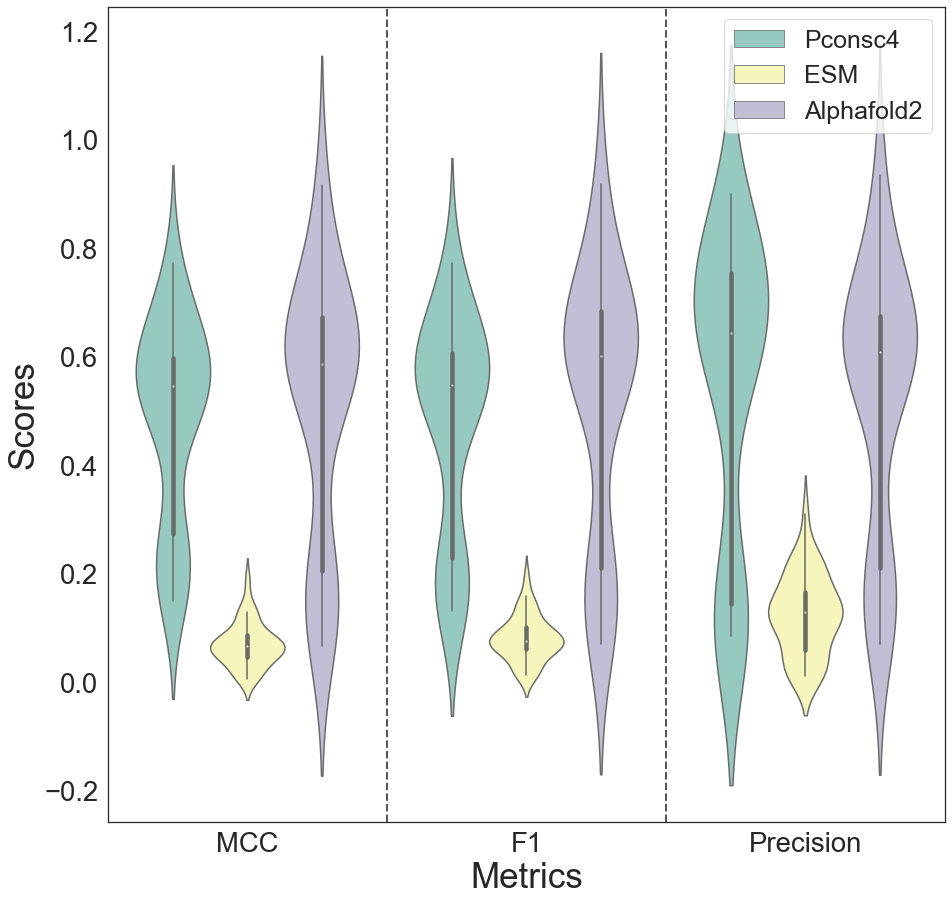

In [104]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("white")
fig = plt.figure(figsize=(15, 15))

#adjust_box_widths(fig, 1)
# Define order of x-axis variables
metric_order = [ 'MCC', 'F1','Precision']

# Define order of hue variable (methods)
#hue_order = df_all_results['Method'].unique()
hue_order=['Pconsc4','ESM','Alphafold2']
# Create figure


# Create boxplot using seaborn
ax=sns.violinplot(x='variable', y='value', hue='Method', data=pd.melt(df_all_results[['Method', 'Precision', 'MCC', 'F1']], id_vars=['Method']), order=metric_order, palette="Set3", hue_order=hue_order,scale='width')

# Add vertical lines separating x-axis variables
for i in range(len(metric_order) - 1):
    ax.axvline(x=i + 0.5, ymin=0, ymax=1, color='#555555', linestyle='--', linewidth=2)

# Set labels and legend
ax.set_xlabel('Metrics', fontsize=35)
ax.set_ylabel('Scores', fontsize=35)
plt.legend(loc='upper right', fontsize=25)

# Show plot
plt.show()
# fig.savefig(os.path.join('results',  'cmap_comparision' + '.png'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results',  'cmap_comparision' + '.pdf'), dpi=500, bbox_inches='tight')
# fig.savefig(os.path.join('results',  'cmap_comparision' + '.svg'), dpi=500, bbox_inches='tight')

